### 최소제곱법<br>
$
y=ax+b
$<br>
$x$: 독립변수, $y$: 종속변수, $x$의 값에 따라 $y$의 값이 변경됨.<br>
최소제곱법은 위의 방정식에서 기울기 $a$값과 $y$의 절편 $b$ 값을 찾아내는 방법<br>
<br>

$$
a = \sum_{i}^{n} { (x_{i}-\bar{x})(y_i-\bar{y}) \over (x_i-\bar{x})^2 }
$$
$$
b = \bar{y}-(\bar{x}\times a)
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([2,4,6,8])
y = np.array([81,93,91,97])

a = 0
numerator = 0
denominator = 0
for i in range(x.shape[0]):
    #print(f"(({x[i]}-{x.mean()})*({y[i]}-{y.mean()}))")
    numerator += ((x[i]-x.mean())*(y[i]-y.mean()))
    denominator += (x[i]-x.mean())**2

#print(numerator)
#print(denominator)
a = numerator/denominator
print(f"a: {a}")

b = y.mean()-(x.mean()*a)
#print(f"{y.mean()}-({x.mean()}*{a})")
print(f"b: {b}")

a: 2.3
b: 79.0


### 평균제곱오차(MSE)

$$
MSE = {1 \over n}\sum_i^n(\hat{y}_{i}-y_{i})^2
$$

In [3]:
# 기울기와 절편
a = 3
b = 76

In [4]:
def predict(x):
    return a*x+b

In [5]:
y_pred = predict(x)
print(y_pred)

[ 82  88  94 100]


In [6]:
mse = ((y_pred - y)**2).mean()
print(f"mse: {mse}")

mse: 11.0


### 경사하강법

평균제곱 오차 공식을 편미분하여 방정식의 기울기와 절편의 값을 구한다.<br><br>
$
MSE = {1 \over n}\sum_i^n(\hat{y}_{i}-y_{i})^2
$
<br><br>
$
= {1 \over n}\sum_i^n((ax+b)-y_{i})^2
$
<br><br>
위의 공식을 기울기 'a' 와 절편 'b'로 각 편미분한 식은 다음과 같다.

$$ { \partial MSE(a,b) \over \partial{a} } = {2 \over n}\sum_i^n(ax_i+b-y_i)x_i$$
$$ { \partial MSE(a,b) \over \partial{b} } = {2 \over n}\sum_i^n(ax_i+b-y_i)$$

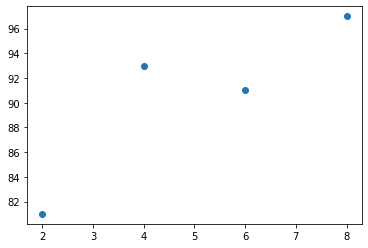

In [15]:


#print(x)
#print(y)

plt.scatter(x, y)
plt.show()

In [32]:

# 기울기와 절편
a = 0
b = 0
# 학습률
lr = 0.05

epoch = 2001
for ep in range(epoch):
    y_pred = predict(x)

    print("y predictions:")
    print(y_pred)
    
    mse = ((y_pred - y)**2).mean()
    print(f"mse: {mse:.3f}")
    # 수식에서는 기울기와 절편의 편미분 공식에 '2'를 곱했지만 실제 코드에서 2를 곱하면 
    # 미분값이 발산하게 된다.
    a_diff = ((y_pred-y)*x).mean() 
    b_diff = (y_pred-y).mean()

    a = a - lr*a_diff
    b = b - lr*b_diff

    print(f"epoch:{ep}, a_diff:{a_diff:.3f}, b_diff:{b_diff:.3f}")
    print(f"\ta:{a:.3f}, b:{b:.3f}")
    

y predictions:
[0 0 0 0]
mse: 8225.000
epoch:0, a_diff:-464.000, b_diff:-90.500
	a:23.200, b:4.525
y predictions:
[ 50.925  97.325 143.725 190.125]
mse: 3093.851
epoch:1, a_diff:254.625, b_diff:30.025
	a:10.469, b:3.024
y predictions:
[23.96125 44.89875 65.83625 86.77375]
mse: 1576.235
epoch:2, a_diff:-134.819, b_diff:-35.133
	a:17.210, b:4.780
y predictions:
[ 39.19975   73.619125 108.0385   142.457875]
mse: 1119.902
epoch:3, a_diff:76.193, b_diff:0.329
	a:13.400, b:4.764
y predictions:
[ 31.56405937  58.36418437  85.16430937 111.96443437]
mse: 975.385
epoch:4, a_diff:-38.178, b_diff:-18.736
	a:15.309, b:5.701
y predictions:
[ 36.31869234  66.93666266  97.55463297 128.17260328]
mse: 922.603
epoch:5, a_diff:23.773, b_diff:-8.254
	a:14.120, b:6.113
y predictions:
[ 34.35409347  62.5947473   90.83540112 119.07605495]
mse: 896.925
epoch:6, a_diff:-9.823, b_diff:-13.785
	a:14.611, b:6.803
y predictions:
[ 36.0256392   65.24859246  94.47154573 123.69449899]
mse: 879.370
epoch:7, a_diff:8.35

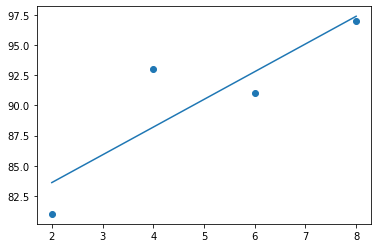

In [33]:
plt.scatter(x, y)
plt.plot(x, y_pred)
plt.show()